https://towardsdatascience.com/unsupervised-machine-learning-spectral-clustering-algorithm-implemented-from-scratch-in-python-205c87271045

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.cluster import SpectralClustering

In [3]:
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()
from tqdm.notebook import tqdm
import csv

In [3]:
df = pd.read_csv('UCI/ecoli.data', delimiter = "\s+", names=["l1", "l2", "l3", "l4","l5","l6","l7","l8","l9"])
df

,l1,l2,l3,l4,l5,l6,l7,l8,l9
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [4]:
df.l9 = pd.Categorical(df.l9)
df['code'] = df.l9.cat.codes
df

,l1,l2,l3,l4,l5,l6,l7,l8,l9,code
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp,0
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp,0
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp,0
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp,0
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp,0
...,...,...,...,...,...,...,...,...,...,...
331,TREA_ECOLI,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp,7
332,UGPB_ECOLI,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp,7
333,USHA_ECOLI,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp,7
334,XYLF_ECOLI,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp,7


In [5]:
y=df["code"]
y

0      0
1      0
2      0
3      0
4      0
      ..
331    7
332    7
333    7
334    7
335    7
Name: code, Length: 336, dtype: int8

In [6]:
df=df.iloc[:,[1,2,3,4,5,6,7]]

In [13]:
# k=clustering number
k=8
cluster=SpectralClustering(n_clusters=k)
cluster.fit(df)
yy=cluster.labels_

In [7]:
df = df.mask(np.random.choice([True, False], size=df.shape, p=[.20,.80]))
df

,l2,l3,l4,l5,l6,l7,l8
0,0.49,0.29,0.48,0.5,0.56,0.24,NaN
1,0.07,0.40,NaN,0.5,0.54,0.35,NaN
2,0.56,0.40,0.48,0.5,0.49,NaN,NaN
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36
4,0.23,0.32,0.48,0.5,0.55,NaN,0.35
...,...,...,...,...,...,...,...
331,NaN,0.56,0.48,0.5,0.47,0.68,NaN
332,0.71,0.57,0.48,NaN,0.48,0.35,0.32
333,0.61,0.60,0.48,0.5,NaN,0.39,0.38
334,0.59,0.61,0.48,NaN,0.42,0.42,0.37


In [28]:
table2=df
#x,y=table2.shape
#print(x,y)

In [9]:
for k in tqdm(range(100)):
    W=[[0.0 for i in range(x)] for j in range(x)]
    for i in range(x):
        for j in range(i+1,x,1):
            z=table2[i:i+1:].append(table2[j:j+1:], ignore_index=True)
            z=z.dropna(axis=1)
            if z.shape[1] == 0:
                continue
            W[i][j]=W[j][i]=pairwise_distances(z.values,metric="l1")[0][1]
            del(z)
        #print(i)
print(W)
with open("ecoli_1.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(W)



[[0.0, 0.66, 0.25000000000000017, 0.55, 0.30000000000000004, 0.48000000000000015, 0.33999999999999997, 0.33000000000000007, 0.81, 0.24000000000000005, 0.15999999999999992, 0.62, 0.13000000000000006, 0.08000000000000002, 0.5700000000000001, 0.6500000000000001, 0.3400000000000001, 0.31, 0.5800000000000001, 0.56, 0.45000000000000007, 0.41999999999999993, 0.27000000000000013, 0.31999999999999995, 0.10000000000000006, 0.08000000000000002, 0.4200000000000001, 0.08000000000000002, 0.11000000000000004, 0.22000000000000008, 0.15000000000000008, 0.48000000000000004, 0.2900000000000001, 0.23000000000000004, 0.36, 0.2900000000000001, 0.6200000000000001, 0.42999999999999994, 0.34, 0.10000000000000006, 0.44000000000000006, 0.2799999999999999, 0.56, 0.3, 0.4700000000000001, 0.59, 0.38000000000000006, 0.3800000000000001, 0.2399999999999999, 0.4800000000000001, 0.6700000000000002, 0.53, 0.7000000000000001, 0.45000000000000007, 0.6, 0.46, 0.4300000000000001, 0.29000000000000004, 0.4500000000000001, 0.2

In [12]:
df = pd.read_csv("ecoli_1.csv",header=None)

In [13]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,326,327,328,329,330,331,332,333,334,335
0,0.00,0.66,0.25,0.55,0.30,0.48,0.34,0.33,0.81,0.24,...,0.89,0.51,0.83,0.67,0.40,0.80,0.69,0.58,0.74,0.95
1,0.66,0.00,0.54,0.73,0.25,0.79,0.56,0.17,0.41,0.52,...,1.07,0.27,1.03,0.47,0.57,0.56,0.87,0.78,0.92,1.24


In [14]:
kk=df.values.tolist()
len(kk)

336

In [15]:
kkk=np.array(kk)
kkk=kkk[:500,:500]
kkk

array([[0.000, 0.660, 0.250, ..., 0.580, 0.740, 0.950],
       [0.660, 0.000, 0.540, ..., 0.780, 0.920, 1.240],
       [0.250, 0.540, 0.000, ..., 0.250, 0.310, 0.700],
       ...,
       [0.580, 0.780, 0.250, ..., 0.000, 0.070, 0.270],
       [0.740, 0.920, 0.310, ..., 0.070, 0.000, 0.390],
       [0.950, 1.240, 0.700, ..., 0.270, 0.390, 0.000]])

In [16]:
vectorizer = np.vectorize(lambda x: 1 if x < 5 else 0)

Ww = np.vectorize(vectorizer)(kk)


In [4]:
Ww=[[0,0,1,0,0,1],[0,0,1,0,1,1],[1,1,0,0,0,0],[0,0,0,0,0,1],[0,1,0,0,0,1],[1,1,0,1,1,0]]

In [5]:
# degree matrix
D = np.diag(np.sum(np.array(Ww), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - Ww
print('laplacian matrix:')
print(L)

degree matrix:
[[2 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 4]]
laplacian matrix:
[[ 2  0 -1  0  0 -1]
 [ 0  3 -1  0 -1 -1]
 [-1 -1  2  0  0  0]
 [ 0  0  0  1  0 -1]
 [ 0 -1  0  0  2 -1]
 [-1 -1  0 -1 -1  4]]


In [6]:
e, v = np.linalg.eigh(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[-0.000 0.882 1.451 2.534 3.865 5.269]
eigenvectors:
[[-0.408 -0.277 0.483 -0.652 0.024 -0.313]
 [-0.408 -0.181 -0.280 0.339 0.672 -0.395]
 [-0.408 -0.410 0.369 0.586 -0.373 0.216]
 [-0.408 0.841 0.231 0.155 -0.115 -0.189]
 [-0.408 -0.073 -0.699 -0.190 -0.536 -0.125]
 [-0.408 0.099 -0.104 -0.238 0.329 0.805]]


In [ ]:
eigv=pd.DataFrame(e)
eigvv=pd.DataFrame

In [ ]:
writer = pd.ExcelWriter('method_eigen_results.xlsx', engine = 'xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1')
# df3.to_excel(writer, sheet_name='Sheet2')
writer.save()

In [7]:
np.where(e<=0)

(array([0]),)

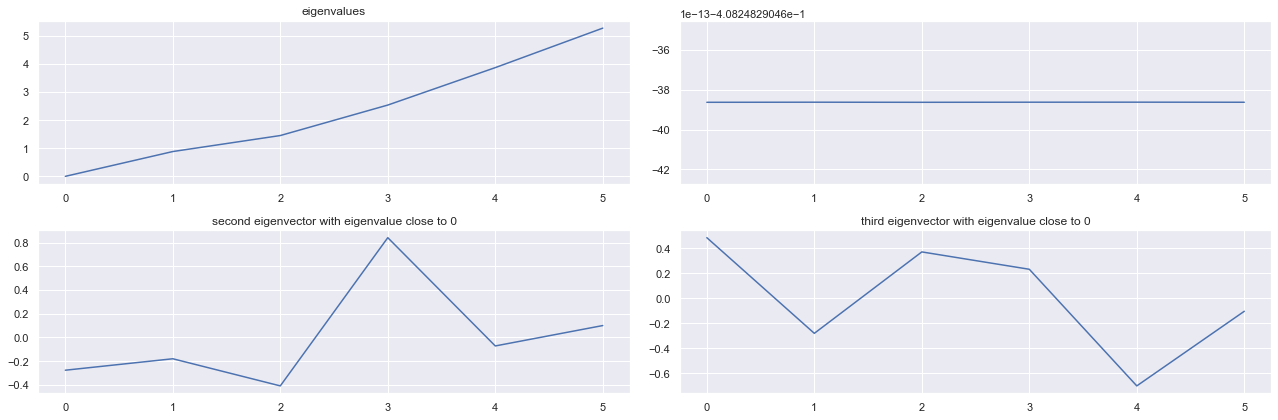

In [8]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(221)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10000)[0]
ax2 = plt.subplot(222)
plt.plot(v[:, i[0]])
ax3 = plt.subplot(223)
plt.plot(v[:, i[1]])
ax3.title.set_text('second eigenvector with eigenvalue close to 0')
ax4 = plt.subplot(224)
plt.plot(v[:, i[2]])
ax4.title.set_text('third eigenvector with eigenvalue close to 0')
fig.tight_layout()

Text(0, 0.5, 'Values')

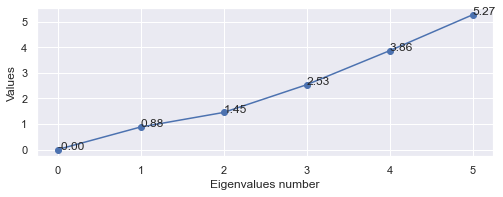

In [9]:
fig = plt.figure(figsize=[18, 6])
ax1 = plt.subplot(221)
plt.plot(e, marker = 'o')
x=[0,1,2,3,4,5]
for x, y, text in zip(x, e, e):
    plt.text(x, y, '{0:.2f}'.format(text))
plt.xlabel("Eigenvalues number")
plt.ylabel("Values")


Text(0, 0.5, 'Value at ith position of v')

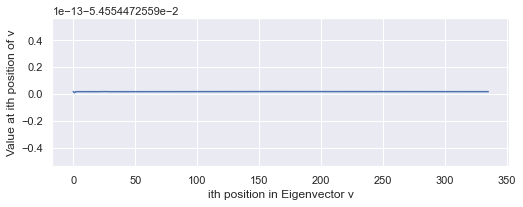

In [22]:
fig = plt.figure(figsize=[18, 6])

i = np.where(e < 10000)[0]
ax2 = plt.subplot(221)
plt.plot(v[:, i[0]])
plt.xlabel("ith position in Eigenvector v")
plt.ylabel("Value at ith position of v")


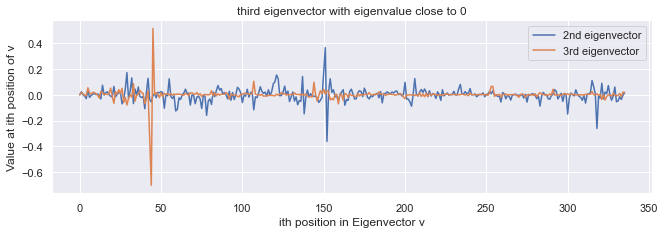

In [23]:
fig = plt.figure(figsize=[18, 6])
ax3 = plt.subplot(221)
plt.plot(v[:, i[1]], label="2nd eigenvector")#, marker = 'o')
plt.legend()
plt.xlabel("ith position in Eigenvector v")
plt.ylabel("Value at ith position of v")
ax3.title.set_text('second eigenvector with eigenvalue close to 0')
ax4 = plt.subplot(221)
plt.plot(v[:, i[2]], label="3rd eigenvector")#, marker = 'o')
plt.legend()
plt.xlabel("ith position in Eigenvector v")
plt.ylabel("Value at ith position of v")
ax4.title.set_text('third eigenvector with eigenvalue close to 0')
fig.tight_layout()

In [24]:
df1=pd.DataFrame(v[:, i[1]])
df2=pd.DataFrame(v[:, i[2]])
# df3=pd.DataFrame(v[:, i[0]])
df=pd.concat([df1, df2], axis=1)
df.columns=['2nd eigenvector','3rd eigenvector']
writer = pd.ExcelWriter('ecoli_result.xlsx', engine = 'xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1')
# df3.to_excel(writer, sheet_name='Sheet2')
writer.save()

In [17]:
U = np.array(v[:, i[2]])

In [18]:
km = KMeans(init='k-means++', n_clusters=8)
km.fit(U.reshape(-1, 1))
km.labels_

array([0, 4, 0, 0, 6, 7, 4, 0, 4, 4, 0, 0, 6, 4, 4, 0, 0, 0, 0, 7, 6, 5,
       4, 0, 4, 0, 7, 5, 6, 5, 6, 0, 6, 7, 5, 0, 0, 4, 4, 0, 5, 6, 4, 3,
       1, 2, 0, 4, 0, 6, 4, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 6, 4, 4, 0, 0, 4, 0, 0, 6, 0, 0, 0, 0, 0, 4, 6, 4, 6, 0, 0, 0,
       0, 0, 4, 0, 6, 0, 0, 0, 0, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0,
       0, 0, 0, 6, 6, 6, 0, 0, 0, 6, 6, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 7, 0, 5, 0, 4, 0, 4, 0, 4, 4,
       5, 6, 5, 0, 0, 5, 0, 0, 5, 0, 0, 6, 0, 0, 0, 6, 6, 0, 6, 0, 0, 0,
       0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 6, 6, 0, 0, 0, 0, 0, 0, 0, 6, 4, 6, 0, 6, 0, 6, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 7, 7, 6, 0, 0, 0, 6, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 6, 0, 4, 0, 0,
       0, 0, 6, 0, 0, 4, 0, 0, 0, 0, 6, 0, 0, 0, 0,

In [29]:
purity_score(km.labels_, y)

0.6845238095238095

7

In [9]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [30]:
purity_score(km.labels_, y)

0.6845238095238095

In [31]:
print(f1_score(km.labels_, y, average="weighted"))
print(precision_score(km.labels_, y, average="weighted"))
print(recall_score(km.labels_, y, average="weighted"))    


0.3233245774408706
0.44140859140859134
0.2619047619047619


0.5505952380952381

In [14]:
print(purity_score(yy, y))
print(precision_score(yy, y, average="weighted"))
 


0.6041666666666666
0.14544681508967222


In [32]:
features=table2
labels = pd.DataFrame(km.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data
labeledColleges = pd.concat((features,labels),axis=1)
labeledColleges = labeledColleges.rename({0:'labels'},axis=1)

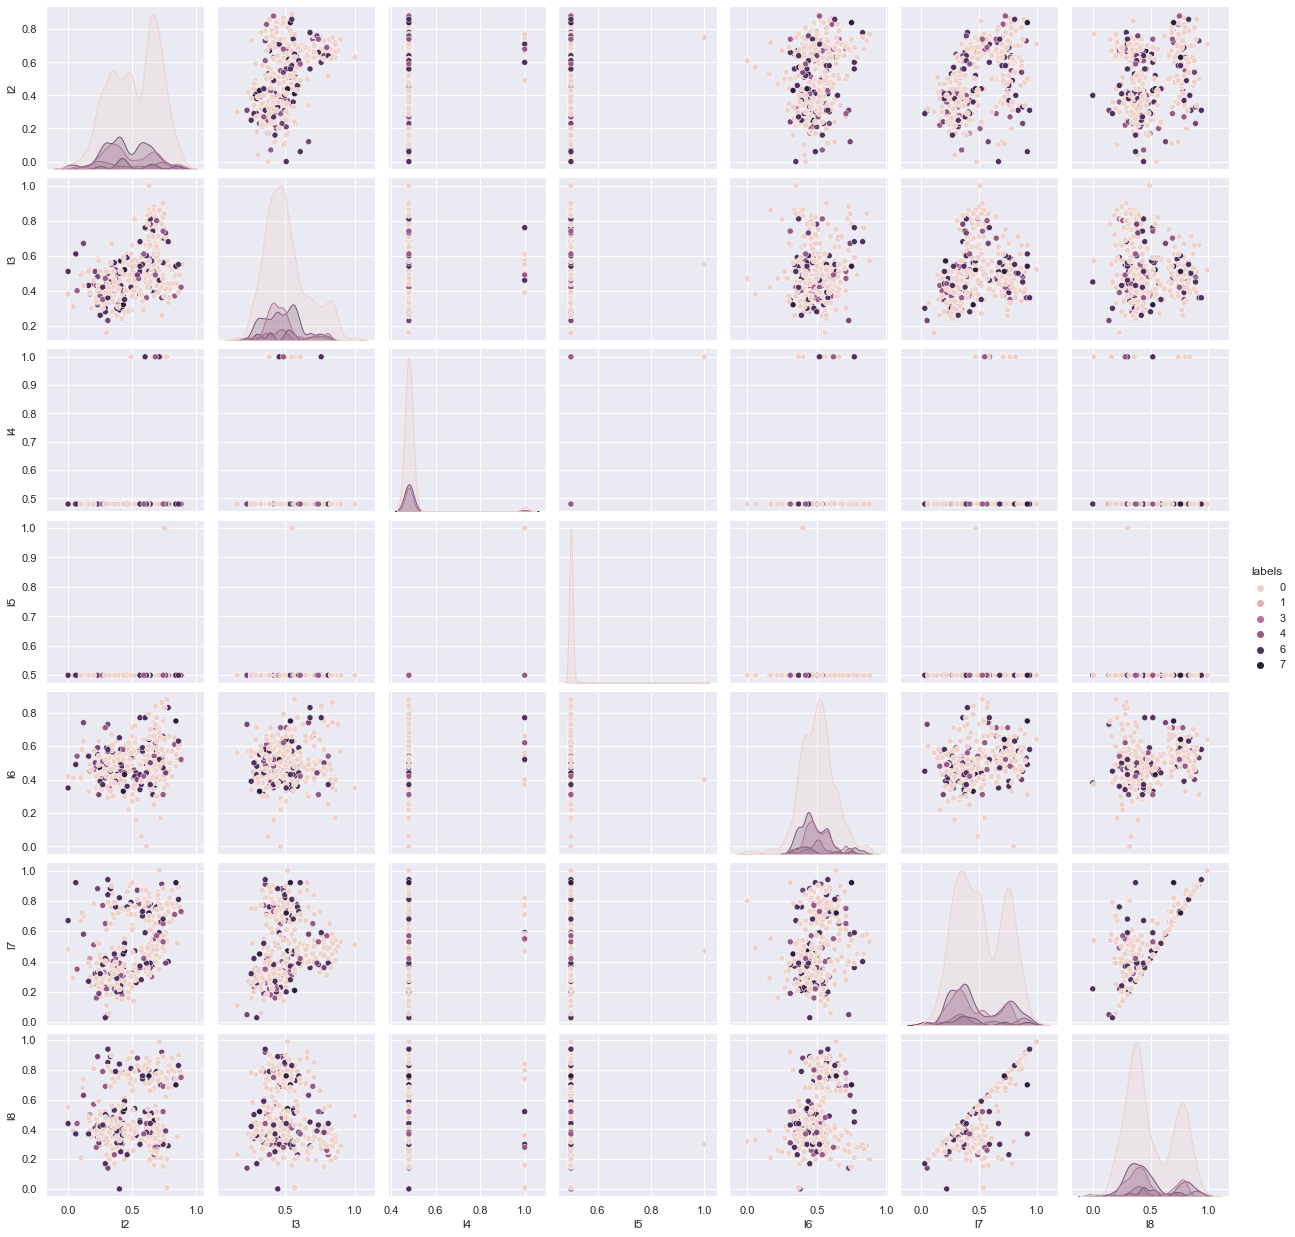

In [33]:
sns.pairplot(labeledColleges,hue='labels',diag_kws={'bw': 0.2})

In [ ]:
#sns.lmplot(x='Top10perc',y='S.F.Ratio',data=labeledColleges,hue='labels',fit_reg=False)

In [34]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels, metric='euclidean', sample_size=None, random_state=None)

-0.3628238443133726